<a href="https://colab.research.google.com/github/PranayPrasanth/ml-mini-projects/blob/main/fcc_bikes_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [ ]:
dataset_cols = ['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional']



In [ ]:
df = pd.read_csv('SeoulBikeData.csv')

In [ ]:
df.head()
df.shape

(365, 7)

In [ ]:
df.drop(['Date', 'Holiday', 'Seasons'], axis=1, inplace=True)


In [ ]:
df.columns = dataset_cols
df['functional'] = (df['functional'] == 'Yes').astype(int)
df = df[df['hour'] == 12]

df.drop(['hour'], axis=1, inplace=True)


<ipython-input-9-7ee9be12e64b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['hour'], axis=1, inplace=True)


In [ ]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


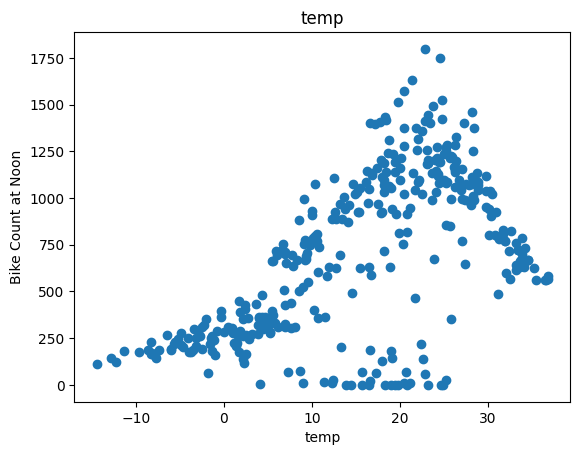

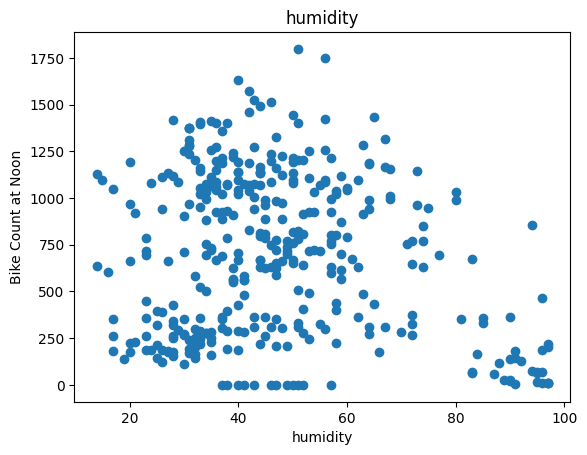

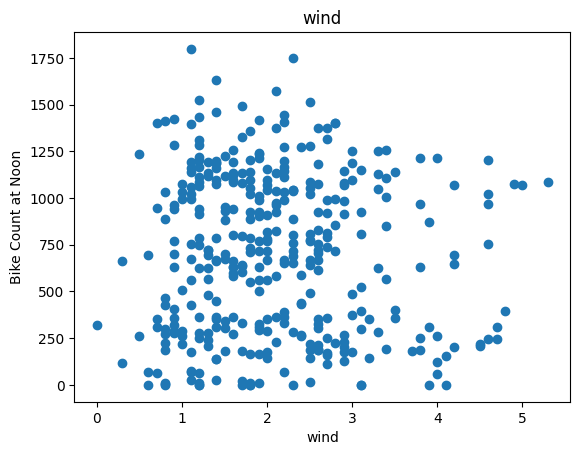

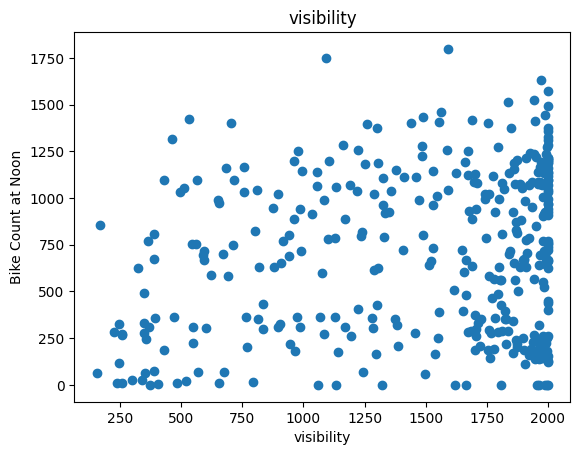

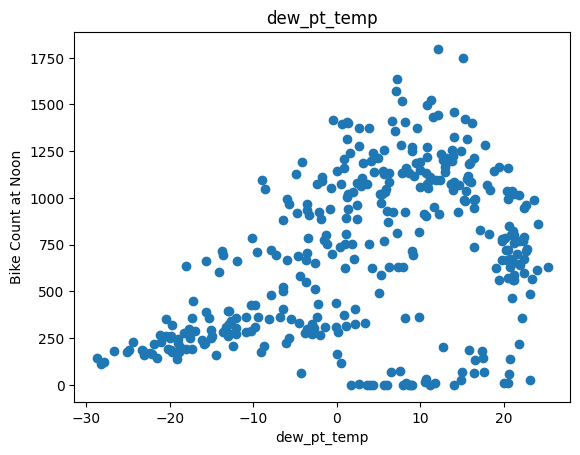

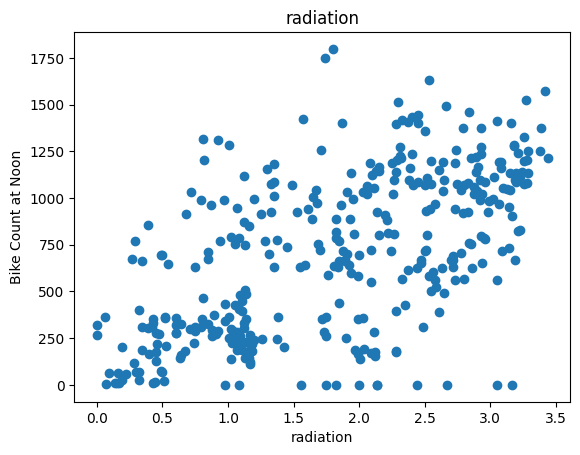

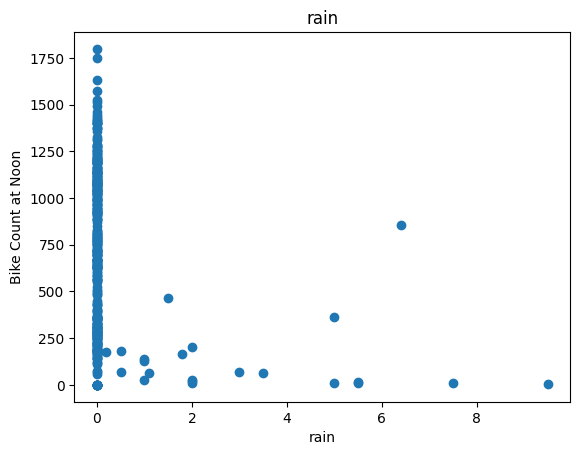

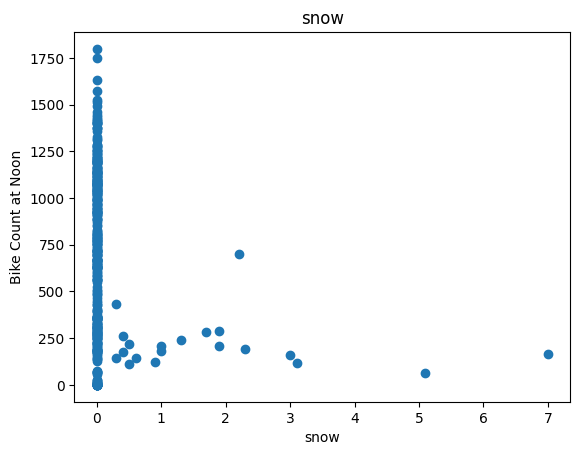

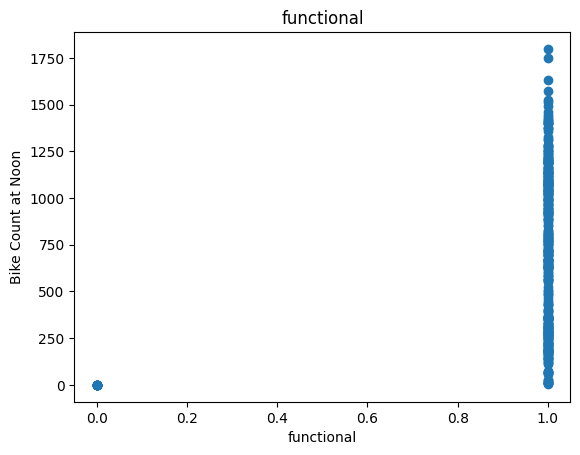

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label], df['bike_count'])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Bike Count at Noon")
  plt.show()

In [ ]:

df.drop(['wind', 'visibility', 'functional'], axis=1, inplace=True)

In [ ]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


Train/valid/test split


In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))] )



/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!= y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels].values.reshape(-1,1)
    else:
      X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1,1)

    data = np.hstack((X, y))
    return data, X, y

In [ ]:
_, X_train_temp, y_train_temp = get_xy(train, 'bike_count', x_labels=['temp'])
_, X_val_temp, y_val_temp = get_xy(val, 'bike_count', x_labels=['temp'])
_, X_test_temp, y_test_temp = get_xy(test, 'bike_count', x_labels=['temp'])

In [ ]:
X_train_temp

array([[ 33.2],
       [ 13.2],
       [  4.3],
       [ 21.8],
       [ 30.2],
       [  2.4],
       [  8.5],
       [ -1.5],
       [ 36.6],
       [ -6. ],
       [ 21.2],
       [ 23.2],
       [ -0.8],
       [ 10.6],
       [ 23.2],
       [ 12.8],
       [  5.5],
       [ 15.5],
       [ 31.7],
       [ 22.2],
       [  6.9],
       [  8.5],
       [ 24.4],
       [ 36.8],
       [  2.2],
       [  9. ],
       [ 28.9],
       [ 16.8],
       [ 25.2],
       [ 28.9],
       [ 29.8],
       [  1.8],
       [ 18.8],
       [ 24.1],
       [  7.1],
       [ 28.4],
       [ -6. ],
       [ 22.5],
       [ 26.3],
       [ 19. ],
       [ -4.6],
       [ 23.7],
       [ 27.8],
       [ 31.2],
       [ 26.9],
       [ 18.7],
       [ 17.5],
       [ 28.1],
       [ 27.4],
       [ 27.4],
       [ 16.6],
       [ 19.1],
       [ 10.6],
       [  6.9],
       [ 19.4],
       [  6.9],
       [ 23.1],
       [ -3.4],
       [  9.1],
       [ -1.3],
       [ 14.2],
       [ 27. ],
       [

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [ ]:
temp_reg.score(X_test_temp, y_test_temp)

0.1934757454536935

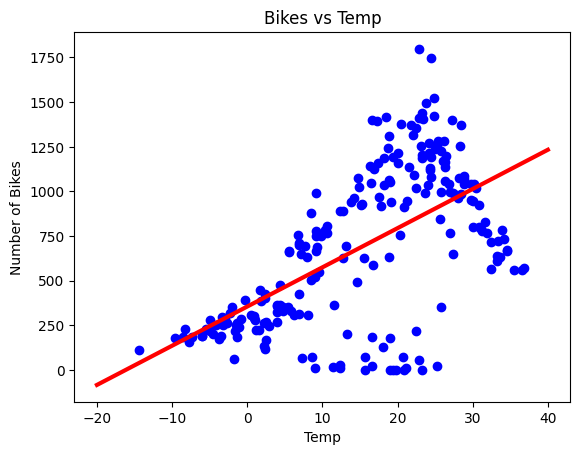

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='Blue')


x = np.array(x).reshape(-1,1)
plt.plot(x, temp_reg.predict(x), label='Fit', color='red', linewidth=3)
plt.title('Bikes vs Temp')
plt.ylabel('Number of Bikes')
plt.xlabel('Temp')
plt.show()

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

_, X_train_all, y_train_all = get_xy(train, 'bike_count', x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, 'bike_count', x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, 'bike_count', x_labels=df.columns[1:])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
all_reg = LinearRegression()
all_reg = all_reg.fit(X_train_all, y_train_all)

In [ ]:
all_reg.score(X_test_all, y_test_all)

0.4453852234419481

Linear Regression using TensorFlow


In [ ]:


def plot_history(history):
    """
    Plots training & validation accuracy and loss from a history object.

    Parameters:
    history: Keras History object returned by model.fit()

    Returns:
    None
    """
    # Check if 'accuracy' or 'acc' exists
    acc_key = 'accuracy' if 'accuracy' in history.history else 'acc'
    val_acc_key = 'val_accuracy' if 'val_accuracy' in history.history else 'val_acc'

    epochs = range(1, len(history.history[acc_key]) + 1)

    # Plot Accuracy
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history[acc_key], label='Training Accuracy', marker='o')
    plt.plot(epochs, history.history[val_acc_key], label='Validation Accuracy', marker='s', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.grid()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss', marker='o', color='red')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='s', linestyle='dashed', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1,))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)



Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.0000e+00 - loss: 137986.0469 - val_accuracy: 0.0000e+00 - val_loss: 147892.7656
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 134680.4531 - val_accuracy: 0.0000e+00 - val_loss: 147681.2812
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 133640.2188 - val_accuracy: 0.0000e+00 - val_loss: 147478.7344
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 138956.9062 - val_accuracy: 0.0000e+00 - val_loss: 147270.8125
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 138701.6250 - val_accuracy: 0.0000e+00 - val_loss: 147058.9219
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 134043.5312 - val_accuracy: 0.0000e+00 - val_loss: 146844.2969
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 148080.2812 - val_accuracy: 0.0000e+00 - val_los

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


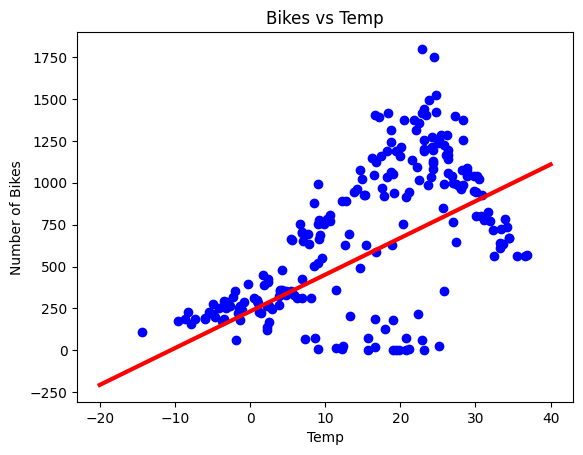

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='Blue')


x = np.array(x).reshape(-1,1)
plt.plot(x, temp_nn_model.predict(x), label='Fit', color='red', linewidth=3)
plt.title('Bikes vs Temp')
plt.ylabel('Number of Bikes')
plt.xlabel('Temp')
plt.show()

In [ ]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
history = nn_model.fit(X_train_temp, y_train_temp,
                       validation_data=(X_val_temp, y_val_temp),
                       verbose=0, epochs=100
                       )

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


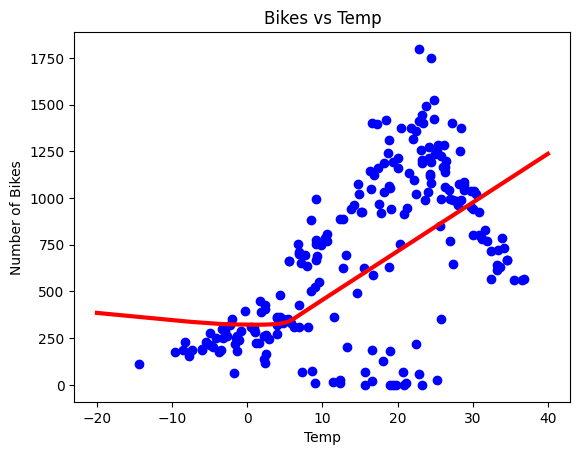

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='Blue')


x = np.array(x).reshape(-1,1)
plt.plot(x,nn_model.predict(x), label='Fit', color='red', linewidth=3)
plt.title('Bikes vs Temp')
plt.ylabel('Number of Bikes')
plt.xlabel('Temp')
plt.show()

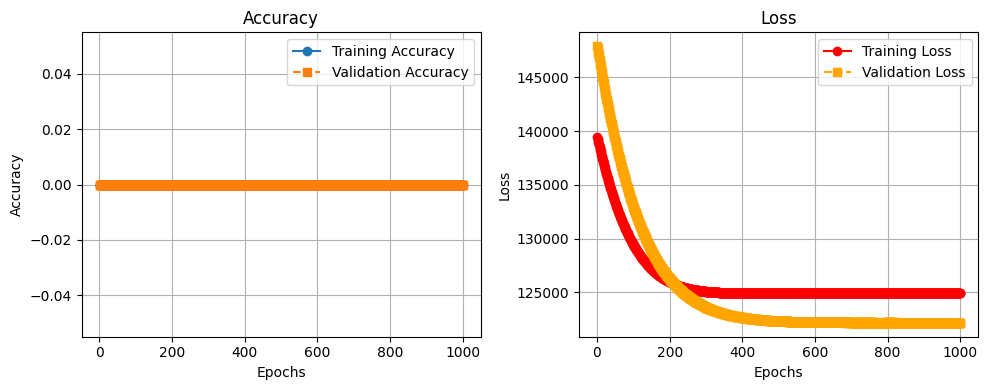

In [ ]:
plot_history(history)